In [24]:
#Preprocessing
import pandas as pd
import numpy as np
import string
import re
import contractions
# import spacy
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Model Algorithms
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import contractions

import time

import warnings
warnings.filterwarnings('ignore')

### Read Training Dataset 

In [26]:
train=pd.read_csv("train_dataset.csv",encoding="unicode_escape")
test=pd.read_csv("test_dataset.csv")
print("Initial :")

print('Train')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())

Initial :
Train
------------------
                                               input    output  \
0  `` The implementation of these programs has ha...  negative   
1  InterContinental Hotels first-quarter global r...  negative   
2  ALEXANDRIA , Va. , March 15 -- Jaakko Vilo of ...   neutral   
3  Caterpillar: 3 lessons from an iconic brand ab...   neutral   
4  `` The rest of this week 's tapings of Jimmy K...   neutral   

                                         instruction  
0  What is the sentiment of this news? Please cho...  
1  What is the sentiment of this news? Please cho...  
2  What is the sentiment of this news? Please cho...  
3  What is the sentiment of this tweet? Please ch...  
4  What is the sentiment of this news? Please cho...  

Test
------------------
                                               input    output  \
0  X FINANCIAL INVESTOR ALERT: Wolf Haldenstein A...  negative   
1  Work on the assignment has already started and...   neutral   
2  Insurers: Ad

### Attribute Selection

In [27]:
print('Attribute Selection :')
print('\nTrain')
print('------------------')
train=train[['input','output']]

print(train.head())

print('\nTest')
print('------------------')
test=test[['input','output']]
print('Attribute Selection :')
print(test.head())

Attribute Selection :

Train
------------------
                                               input    output
0  `` The implementation of these programs has ha...  negative
1  InterContinental Hotels first-quarter global r...  negative
2  ALEXANDRIA , Va. , March 15 -- Jaakko Vilo of ...   neutral
3  Caterpillar: 3 lessons from an iconic brand ab...   neutral
4  `` The rest of this week 's tapings of Jimmy K...   neutral

Test
------------------
Attribute Selection :
                                               input    output
0  X FINANCIAL INVESTOR ALERT: Wolf Haldenstein A...  negative
1  Work on the assignment has already started and...   neutral
2  Insurers: Admiral blows hot and cold but Aviva...   neutral
3  $JELD - Jeld-Wen Holding (JELD) Presents At 7t...   neutral
4         Compass Group says positive for year ahead  positive


### Drop rows with null values 

In [28]:
train.isnull().sum()
train=train.dropna(axis=0)

test.isnull().sum()
test=test.dropna(axis=0)

### Convert to lowercase 

In [29]:
print('Lowercase')
print('\nTrain')
print('------------------')
train['input']=train['input'].str.lower()
print(train['input'].head())

print('\nTest')
print('------------------')
test['input']=test['input'].str.lower()
print('Lowercase')
print(test['input'].head())

Lowercase

Train
------------------
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march 15 -- jaakko vilo of ...
3    caterpillar: 3 lessons from an iconic brand ab...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
Lowercase
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at 7t...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove URL

In [30]:
print('Remove URL')
print('\nTrain')
print('------------------')
train['input'] = train['input'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print("Remove URL: ")
print(train['input'].head())


print('\nTest')
print('------------------')
test['input'] = test['input'].replace('((www.[^\s]+)|(https?://[^\s]+))', '', regex = True)
print(test['input'].head())

Remove URL

Train
------------------
Remove URL: 
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march 15 -- jaakko vilo of ...
3    caterpillar: 3 lessons from an iconic brand ab...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at 7t...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove Emoji 

In [31]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

print('Remove Emoji')
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(lambda text: remove_emojis(text))
print(train['input'].head())


print('\nTest')
print('------------------')
test['input'] = test['input'].apply(lambda text: remove_emojis(text))
print(test['input'].head())

Remove Emoji

Train
------------------
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march 15 -- jaakko vilo of ...
3    caterpillar: 3 lessons from an iconic brand ab...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at 7t...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove @user 

In [32]:
print('Remove @ User')
print('\nTrain')
print('------------------')
train['input'] = train['input'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].replace('(@[^\s]+)', '', regex = True)
print("Remove @user: ")
print(test['input'].head())

Remove @ User

Train
------------------
Remove @user: 
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march 15 -- jaakko vilo of ...
3    caterpillar: 3 lessons from an iconic brand ab...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
Remove @user: 
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at 7t...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove # keyword 

In [33]:
print('Remove #')
print('\nTrain')
print('------------------')
train['input'] = train['input'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(train['input'].head())


print('\nTest')
print('------------------')
test['input'] = test['input'].replace('(#[^\s]+)', '', regex = True)
print("Remove #keyword: ")
print(test['input'].head())

Remove #

Train
------------------
Remove #keyword: 
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march 15 -- jaakko vilo of ...
3    caterpillar: 3 lessons from an iconic brand ab...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
Remove #keyword: 
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at 7t...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove numerical characters 

In [34]:
print('Remove numerical characters')
print('\nTrain')
print('------------------')
train['input'] = train['input'].replace('[0-9]+', '', regex = True)
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].replace('[0-9]+', '', regex = True)
print("Remove numbers: ")
print(test['input'].head())

Remove numerical characters

Train
------------------
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march  -- jaakko vilo of tu...
3    caterpillar:  lessons from an iconic brand abo...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
Remove numbers: 
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at th...
4           compass group says positive for year ahead
Name: input, dtype: object


### Expand contractions

In [35]:
def expand_contractions(text):
    return " ".join([contractions.fix(word) for word in str(text).split()])
    
    
print('Expand contractions')
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(lambda text: expand_contractions(text))
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].apply(lambda text: expand_contractions(text))
print(test['input'].head())

Expand contractions

Train
------------------
0    `` the implementation of these programs has ha...
1    intercontinental hotels first-quarter global r...
2    alexandria , va. , march -- jaakko vilo of tur...
3    caterpillar: lessons from an iconic brand abou...
4    `` the rest of this week 's tapings of jimmy k...
Name: input, dtype: object

Test
------------------
0    x financial investor alert: wolf haldenstein a...
1    work on the assignment has already started and...
2    insurers: admiral blows hot and cold but aviva...
3    $jeld - jeld-wen holding (jeld) presents at th...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove punctuation 

In [36]:
print('Remove punctuation')
print('\nTrain')
print('------------------')
train['input'] = train['input'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].str.translate(str.maketrans('', '', string.punctuation))
print("Remove punctuation: ")
print(test['input'].head())

Remove punctuation

Train
------------------
Remove punctuation: 
0     the implementation of these programs has had ...
1    intercontinental hotels firstquarter global ro...
2    alexandria  va  march  jaakko vilo of turku  f...
3    caterpillar lessons from an iconic brand about...
4     the rest of this week s tapings of jimmy kimm...
Name: input, dtype: object

Test
------------------
Remove punctuation: 
0    x financial investor alert wolf haldenstein ad...
1    work on the assignment has already started and...
2    insurers admiral blows hot and cold but aviva ...
3    jeld  jeldwen holding jeld presents at th annu...
4           compass group says positive for year ahead
Name: input, dtype: object


### Remove repeated keywords

In [37]:
print('Remove repeated keywords :')
print('\nTrain')
print('------------------')
train['input'] = train['input'].replace(r'(.)\1+', r'\1\1', regex = True)
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].replace(r'(.)\1+', r'\1\1', regex = True)
print(test['input'].head())

Remove repeated keywords :

Train
------------------
0     the implementation of these programs has had ...
1    intercontinental hotels firstquarter global ro...
2    alexandria  va  march  jaakko vilo of turku  f...
3    caterpillar lessons from an iconic brand about...
4     the rest of this week s tapings of jimmy kimm...
Name: input, dtype: object

Test
------------------
0    x financial investor alert wolf haldenstein ad...
1    work on the assignment has already started and...
2    insurers admiral blows hot and cold but aviva ...
3    jeld  jeldwen holding jeld presents at th annu...
4           compass group says positive for year ahead
Name: input, dtype: object


###  Remove Stopwords 

In [38]:
stop_words = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

print("Remove stopwords: ")
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(lambda text: cleaning_stopwords(text))
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].apply(lambda text: cleaning_stopwords(text))
print(test['input'].head())

Remove stopwords: 

Train
------------------
0    implementation programs negative impacts earni...
1    intercontinental hotels firstquarter global ro...
2    alexandria va march jaakko vilo turku finland ...
3    caterpillar lessons iconic brand digital compe...
4    rest week tapings jimmy kimmel live canceled b...
Name: input, dtype: object

Test
------------------
0    x financial investor alert wolf haldenstein ad...
1    work assignment already started due completion...
2    insurers admiral blows hot cold aviva soars pr...
3    jeld jeldwen holding jeld presents th annual i...
4               compass group says positive year ahead
Name: input, dtype: object


### Tokenization

In [39]:
print("Tokenization: ")
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(train['input'].head())


print('\nTest')
print('------------------')
test['input'] = test['input'].apply(nltk.word_tokenize)
print("Tokenization: ")
print(test['input'].head())

Tokenization: 

Train
------------------
Tokenization: 
0    [implementation, programs, negative, impacts, ...
1    [intercontinental, hotels, firstquarter, globa...
2    [alexandria, va, march, jaakko, vilo, turku, f...
3    [caterpillar, lessons, iconic, brand, digital,...
4    [rest, week, tapings, jimmy, kimmel, live, can...
Name: input, dtype: object

Test
------------------
Tokenization: 
0    [x, financial, investor, alert, wolf, haldenst...
1    [work, assignment, already, started, due, comp...
2    [insurers, admiral, blows, hot, cold, aviva, s...
3    [jeld, jeldwen, holding, jeld, presents, th, a...
4        [compass, group, says, positive, year, ahead]
Name: input, dtype: object


In [40]:
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                               input    output
0  [implementation, programs, negative, impacts, ...  negative
1  [intercontinental, hotels, firstquarter, globa...  negative
2  [alexandria, va, march, jaakko, vilo, turku, f...   neutral
3  [caterpillar, lessons, iconic, brand, digital,...   neutral
4  [rest, week, tapings, jimmy, kimmel, live, can...   neutral

Test
------------------
                                               input    output
0  [x, financial, investor, alert, wolf, haldenst...  negative
1  [work, assignment, already, started, due, comp...   neutral
2  [insurers, admiral, blows, hot, cold, aviva, s...   neutral
3  [jeld, jeldwen, holding, jeld, presents, th, a...   neutral
4      [compass, group, says, positive, year, ahead]  positive


### Label Encoding 

In [41]:
train['output'] = train['output'].map({"positive": 1, "neutral": 0, "negative": -1})
test['output'] = test['output'].map({"positive": 1, "neutral": 0, "negative": -1})
print('\nTrain')
print('------------------')
print(train.head())

print('\nTest')
print('------------------')
print(test.head())


Train
------------------
                                               input  output
0  [implementation, programs, negative, impacts, ...      -1
1  [intercontinental, hotels, firstquarter, globa...      -1
2  [alexandria, va, march, jaakko, vilo, turku, f...       0
3  [caterpillar, lessons, iconic, brand, digital,...       0
4  [rest, week, tapings, jimmy, kimmel, live, can...       0

Test
------------------
                                               input  output
0  [x, financial, investor, alert, wolf, haldenst...      -1
1  [work, assignment, already, started, due, comp...       0
2  [insurers, admiral, blows, hot, cold, aviva, s...       0
3  [jeld, jeldwen, holding, jeld, presents, th, a...       0
4      [compass, group, says, positive, year, ahead]       1


In [42]:
print('\nTrain')
print('------------------')
print(train['output'].value_counts())

print('\nTest')
print('------------------')
print(test['output'].value_counts())


Train
------------------
-1    11632
 0    11631
 1    11631
Name: output, dtype: int64

Test
------------------
 0    118
 1    118
-1    117
Name: output, dtype: int64


### POS 

In [43]:
print("POS : ")
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(nltk.pos_tag)
print("POS tagging: ")
print(train['input'].head())

print('\nTest')
print('------------------')
test['input'] = test['input'].apply(nltk.pos_tag)
print("POS tagging: ")
print(test['input'].head())

POS : 

Train
------------------
POS tagging: 
0    [(implementation, NN), (programs, NNS), (negat...
1    [(intercontinental, JJ), (hotels, NNS), (first...
2    [(alexandria, NNS), (va, VBP), (march, NN), (j...
3    [(caterpillar, JJ), (lessons, NNS), (iconic, J...
4    [(rest, NN), (week, NN), (tapings, NNS), (jimm...
Name: input, dtype: object

Test
------------------
POS tagging: 
0    [(x, JJ), (financial, JJ), (investor, NN), (al...
1    [(work, NN), (assignment, NN), (already, RB), ...
2    [(insurers, NNS), (admiral, JJ), (blows, NNS),...
3    [(jeld, NN), (jeldwen, NN), (holding, VBG), (j...
4    [(compass, NN), (group, NN), (says, VBZ), (pos...
Name: input, dtype: object


### Lemmatization

In [44]:
def get_wordnet_pos(treebank_pos):
    if treebank_pos.startswith('J'):
        return wordnet.ADJ
    elif treebank_pos.startswith('V'):
        return wordnet.VERB
    elif treebank_pos.startswith('N'):
        return wordnet.NOUN
    elif treebank_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(text):
    lemmatized_tokens = []

    for i in range(len(text)):
        word, pos = text[i]
        
        lemmatized_tokens.append(nltk.WordNetLemmatizer().lemmatize(word, get_wordnet_pos(pos)))
        
    return " ".join(lemmatized_tokens)

print("Lemmatization : ")
print('\nTrain')
print('------------------')
train['input'] = train['input'].apply(lambda text: lemmatization(text))
print(train['input'].head())


print('\nTest')
print('------------------')
test['input'] = test['input'].apply(lambda text: lemmatization(text))
print(test['input'].head())

Lemmatization : 

Train
------------------
0    implementation program negative impact earning...
1    intercontinental hotel firstquarter global roo...
2    alexandria va march jaakko vilo turku finland ...
3    caterpillar lesson iconic brand digital compet...
4    rest week taping jimmy kimmel live cancel back...
Name: input, dtype: object

Test
------------------
0    x financial investor alert wolf haldenstein ad...
1    work assignment already start due completion s...
2    insurer admiral blow hot cold aviva soar prefr...
3    jeld jeldwen hold jeld present th annual indus...
4                compass group say positive year ahead
Name: input, dtype: object


### Train Test Split

In [45]:
X_train=train['input']
X_test=test['input']
y_train=train['output']
y_test=test['output']

In [46]:
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000)
X_train = tfidf_vectorizer.fit_transform(X_train) #Tokenize and build vocabulary
X_test = tfidf_vectorizer.transform(X_test) #Tokenize and build vocabulary

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(34894, 1000)
(34894,)
(353, 1000)
(353,)


## Ensemble Model 

#### Confusion Matrix 

In [48]:
def confusion_matrix_evaluation(classifier,y_predicted):
    mat=confusion_matrix(y_test,y_predicted)
    sns.heatmap(mat.T, xticklabels=['Predicted 1','Predicted 0','Predicted -1'],yticklabels=['Actual 1','Actual 0','Actual -1'],
                annot=True, fmt='d', cbar=False,cmap="YlGnBu")
    plt.title('Confusion Matrix for '+classifier)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusion_matrix.png")
    plt.show()
    print(classifier+' Classification Report ')
    print('======================================================')
    print(classification_report(y_test,y_predicted))

#### Define Base Learners 

In [49]:
from sklearn.ensemble import RandomForestClassifier
m1=SVC(C=0.1,kernel='linear',random_state=1)
m2=MultinomialNB(alpha=20)
m3=RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100)
m4=LogisticRegression(multi_class='multinomial',random_state=1,solver='saga')

In [50]:
def model_accuracy(m1,m2,m3,m4,classifier):
    print('Doing 2-fold Cross Validation Here :')
    for iterclf,iterlabel in zip([m1,m2,m3,m4,classifier],
                             ['SVC',
                              'MNB',
                              'Random Forest Tree',
                              'Logistic Regression',
                               classifier
                             ]):
     start_time = time.time()
     scores=model_selection.cross_val_score(iterclf,X_train,y_train,cv=2,scoring='accuracy')
     run_time = time.time() - start_time
     print('Accuracy :%0.6f  (+/- %0.4f)  [%20s]   ||  %4.2f seconds'%(scores.mean(),scores.std(),iterlabel,run_time))

### Voting 

Doing 2-fold Cross Validation Here :
Accuracy :0.738093  (+/- 0.0025)  [                 SVC]   ||  232.40 seconds
Accuracy :0.703187  (+/- 0.0001)  [                 MNB]   ||  0.45 seconds
Accuracy :0.688313  (+/- 0.0026)  [  Random Forest Tree]   ||  12.81 seconds
Accuracy :0.786811  (+/- 0.0030)  [ Logistic Regression]   ||  0.94 seconds
Accuracy :0.747378  (+/- 0.0039)  [VotingClassifier(estimators=[('SVC',
                              SVC(C=0.1, kernel='linear', random_state=1)),
                             ('Multinomial Naive Bayes',
                              MultinomialNB(alpha=20)),
                             ('Random Forest Tree',
                              RandomForestClassifier(max_depth=100,
                                                     max_leaf_nodes=65,
                                                     random_state=1)),
                             ('Logistic Regression',
                              LogisticRegression(multi_class='multinomial',
   

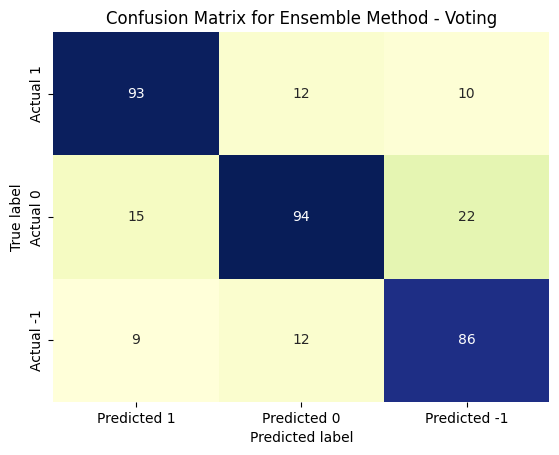

Ensemble Method - Voting Classification Report 
              precision    recall  f1-score   support

          -1       0.81      0.79      0.80       117
           0       0.72      0.80      0.76       118
           1       0.80      0.73      0.76       118

    accuracy                           0.77       353
   macro avg       0.78      0.77      0.77       353
weighted avg       0.78      0.77      0.77       353

Training Accuracy : 0.7781    ||   Training Time  274.79 seconds


In [51]:
votingCLF=VotingClassifier([('SVC',m1),('Multinomial Naive Bayes',m2),('Random Forest Tree',m3),('Logistic Regression',m4)
                       ])
model_accuracy(m1,m2,m3,m4,votingCLF)  
start_time = time.time()
votingCLF.fit(X_train,y_train)
run_time = time.time() - start_time
predicted_Vote=votingCLF.predict(X_test)

print('\t\t\t Voting')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Voting',predicted_Vote)
print('Training Accuracy : %.4f    ||   Training Time  %4.2f seconds' % (votingCLF.score(X_train, y_train),run_time))

#### Bagging  

Doing 2-fold Cross Validation Here :
Accuracy :0.738093  (+/- 0.0025)  [                 SVC]   ||  245.18 seconds
Accuracy :0.703187  (+/- 0.0001)  [                 MNB]   ||  0.13 seconds
Accuracy :0.688313  (+/- 0.0026)  [  Random Forest Tree]   ||  13.26 seconds
Accuracy :0.786811  (+/- 0.0030)  [ Logistic Regression]   ||  1.01 seconds
Accuracy :0.692096  (+/- 0.0022)  [BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=100,
                                                        max_leaf_nodes=65,
                                                        random_state=1),
                  max_samples=0.7, n_estimators=20, oob_score=True,
                  random_state=1)]   ||  219.84 seconds
			 Bagging



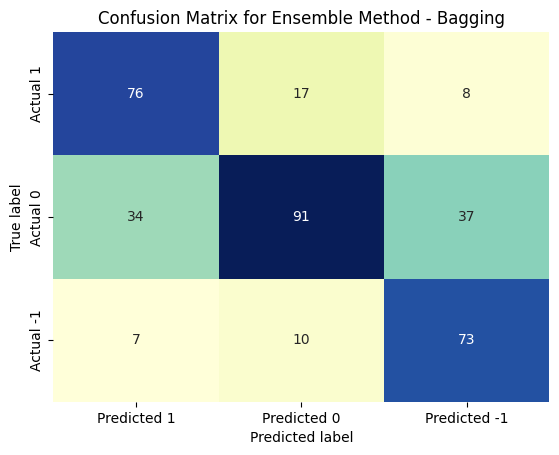

Ensemble Method - Bagging Classification Report 
              precision    recall  f1-score   support

          -1       0.75      0.65      0.70       117
           0       0.56      0.77      0.65       118
           1       0.81      0.62      0.70       118

    accuracy                           0.68       353
   macro avg       0.71      0.68      0.68       353
weighted avg       0.71      0.68      0.68       353

Training Accuracy : 0.6947   ||   Training Time  149.16 seconds


In [52]:
bag_model=BaggingClassifier(
    base_estimator=RandomForestClassifier(random_state=1,max_leaf_nodes=65,max_depth=100),
    n_estimators=20, #n_estimator - how many subgroup of dataset
    max_samples=0.7, #Use 80%of sample
    oob_score=True, #Out of bag 
    random_state=1
)
model_accuracy(m1,m2,m3,m4,bag_model) 
start_time = time.time()
bag_model.fit(X_train,y_train)
run_time = time.time() - start_time
predictedBag=bag_model.predict(X_test)
score_Bag=accuracy_score(predictedBag,y_test)

print('\t\t\t Bagging')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Bagging',predictedBag)
print('Training Accuracy : %.4f   ||   Training Time  %4.2f seconds' % (bag_model.score(X_train, y_train),run_time))

### Stacking 

Doing 2-fold Cross Validation Here :
Accuracy :0.738093  (+/- 0.0025)  [                 SVC]   ||  248.97 seconds
Accuracy :0.703187  (+/- 0.0001)  [                 MNB]   ||  0.10 seconds
Accuracy :0.688313  (+/- 0.0026)  [  Random Forest Tree]   ||  11.88 seconds
Accuracy :0.786811  (+/- 0.0030)  [ Logistic Regression]   ||  1.10 seconds
Accuracy :0.790594  (+/- 0.0041)  [StackingClassifier(estimators=[('SVC',
                                SVC(C=0.1, kernel='linear', random_state=1)),
                               ('Multinomial Naive Bayes',
                                MultinomialNB(alpha=20)),
                               ('Random Forest Tree',
                                RandomForestClassifier(max_depth=100,
                                                       max_leaf_nodes=65,
                                                       random_state=1)),
                               ('Logistic Regression',
                                LogisticRegression(multi_clas

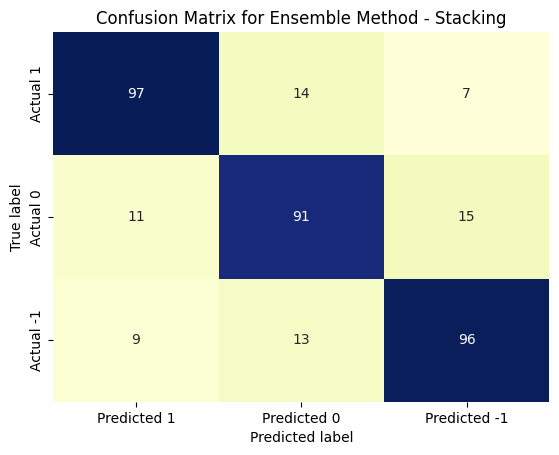

Ensemble Method - Stacking Classification Report 
              precision    recall  f1-score   support

          -1       0.82      0.83      0.83       117
           0       0.78      0.77      0.77       118
           1       0.81      0.81      0.81       118

    accuracy                           0.80       353
   macro avg       0.80      0.80      0.80       353
weighted avg       0.80      0.80      0.80       353

Training Accuracy : 0.8189   ||   Training Time  1236.07 seconds


In [53]:
stackingCLF=StackingClassifier([('SVC',m1),('Multinomial Naive Bayes',m2),('Random Forest Tree',m3),('Logistic Regression',m4)
                       ])
model_accuracy(m1,m2,m3,m4,stackingCLF)   
start_time = time.time()
stackingCLF.fit(X_train,y_train)
run_time = time.time() - start_time
stack_predicted=stackingCLF.predict(X_test)

print('\t\t\t Stacking')
print('================================================================\n')
confusion_matrix_evaluation('Ensemble Method - Stacking',stack_predicted)
print('Training Accuracy : %.4f   ||   Training Time  %4.2f seconds' % (stackingCLF.score(X_train, y_train),run_time))